In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

usEducation = pd.read_sql_query('select * from useducation',con=engine)
engine.dispose()

usEducation.columns = usEducation.columns.str.lower()

# 1) Derive the descriptive statistics of the data and discuss the points you find remarkable.

In [3]:
usEducation.head()

,primary_key,state,year,enroll,total_revenue,federal_revenue,state_revenue,local_revenue,total_expenditure,instruction_expenditure,...,grades_4_g,grades_8_g,grades_12_g,grades_1_8_g,grades_9_12_g,grades_all_g,avg_math_4_score,avg_math_8_score,avg_reading_4_score,avg_reading_8_score
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [4]:
fill_list = ["enroll", "total_revenue", "federal_revenue", 
             "state_revenue", "federal_revenue", "total_expenditure", 
             "instruction_expenditure", "support_services_expenditure",
             "other_expenditure", "capital_outlay_expenditure", "grades_pk_g", 
             "grades_kg_g", "grades_4_g", "grades_8_g", "grades_12_g", "grades_all_g", 
             "avg_math_4_score", "avg_math_8_score",'avg_reading_4_score','avg_reading_4_score','avg_reading_8_score']
for col in fill_list:
    usEducation.loc[:, col] = usEducation.loc[:, col].fillna(usEducation.loc[:, col].mean())

In [5]:
usEducation.isnull().sum()/usEducation.isnull().count()

primary_key                     0.000000
state                           0.000000
year                            0.000000
enroll                          0.000000
total_revenue                   0.000000
federal_revenue                 0.000000
state_revenue                   0.000000
local_revenue                   0.142091
total_expenditure               0.000000
instruction_expenditure         0.000000
support_services_expenditure    0.000000
other_expenditure               0.000000
capital_outlay_expenditure      0.000000
grades_pk_g                     0.000000
grades_kg_g                     0.000000
grades_4_g                      0.000000
grades_8_g                      0.000000
grades_12_g                     0.000000
grades_1_8_g                    0.087802
grades_9_12_g                   0.087802
grades_all_g                    0.000000
avg_math_4_score                0.000000
avg_math_8_score                0.000000
avg_reading_4_score             0.000000
avg_reading_8_sc

In [6]:
years = usEducation["year"].unique()

for col in fill_list:
    for year in years:
        usEducation.loc[usEducation["year"] == year, col] = usEducation.loc[usEducation["year"] == year, col].fillna(
            usEducation[usEducation["year"] == year][col].mean())

In [7]:
usEducation.describe()

,year,enroll,total_revenue,federal_revenue,state_revenue,local_revenue,total_expenditure,instruction_expenditure,support_services_expenditure,other_expenditure,...,grades_4_g,grades_8_g,grades_12_g,grades_1_8_g,grades_9_12_g,grades_all_g,avg_math_4_score,avg_math_8_score,avg_reading_4_score,avg_reading_8_score
count,1492.000000,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.280000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,...,1492.000000,1492.000000,1492.000000,1.361000e+03,1.361000e+03,1.492000e+03,1492.000000,1492.000000,1492.000000,1492.000000
mean,2004.433646,9.159308e+05,9.092082e+06,7.663723e+05,4.216553e+06,4.109157e+06,9.196681e+06,4.762966e+06,2.680331e+06,4.292046e+05,...,64538.927259,64271.057311,54268.924320,5.192140e+05,2.470714e+05,8.024415e+05,234.768293,278.414711,218.866154,263.661132
std,7.393983,9.667725e+05,1.087818e+07,1.060702e+06,5.133895e+06,5.482971e+06,1.109393e+07,5.828468e+06,3.105812e+06,4.846832e+05,...,76684.998585,75364.301721,64838.328605,6.436384e+05,3.077056e+05,9.126522e+05,6.122843,6.063038,4.641053,3.928132
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,633.000000,437.000000,311.000000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,1998.000000,3.150940e+05,2.546261e+06,2.170200e+05,1.356434e+06,7.158345e+05,2.523968e+06,1.343611e+06,7.673688e+05,1.354282e+05,...,15195.500000,15682.750000,13437.000000,1.106260e+05,5.147100e+04,2.293578e+05,234.768293,278.414711,218.866154,263.661132
50%,2004.000000,8.204140e+05,6.359310e+06,5.167410e+05,3.127639e+06,2.055780e+06,6.520224e+06,3.358142e+06,1.913844e+06,3.672335e+05,...,49884.500000,49571.000000,39566.000000,3.457750e+05,1.642600e+05,6.473260e+05,234.768293,278.414711,218.866154,263.661132
75%,2011.000000,9.211780e+05,9.276958e+06,7.663723e+05,4.269811e+06,4.768680e+06,9.434922e+06,4.938820e+06,2.795888e+06,4.568915e+05,...,71814.250000,72131.000000,64616.250000,6.119050e+05,2.905020e+05,8.724220e+05,234.768293,278.414711,218.866154,263.661132
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,5.944746e+06,253.420961,300.568235,236.773867,280.499130


1) Total Revenue and Federal Revenue are close in numbers. Meaning most revenue goes to federal.

2)Total Expenditure is greater than Total Revenue when we compare the mean, median, and max. More money was spent than what we received as revenue.

3) Instruction Expenditure is about half of Total Revenue. 

4) On average the math scores for each grades are higher than average reading score. Std for average math is about the same


# 2) Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years.

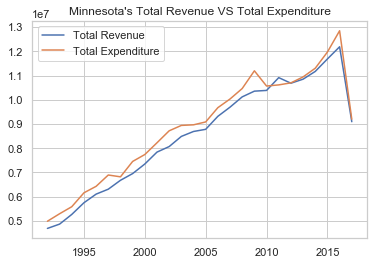

In [8]:
plt.plot(usEducation.loc[usEducation.state=='MINNESOTA', 'year'], 
usEducation.loc[usEducation.state=='MINNESOTA', 'total_revenue'], 
label ='Total Revenue')
plt.title("Minnesota's Total Revenue VS Total Expenditure")
plt.plot(usEducation.loc[usEducation.state=='MINNESOTA', 'year'],
usEducation.loc[usEducation.state=='MINNESOTA', 'total_expenditure'],
label ='Total Expenditure')
plt.legend()
plt.show()

# 3) In your chosen state, which of the lessons are the students more successful, math or reading?

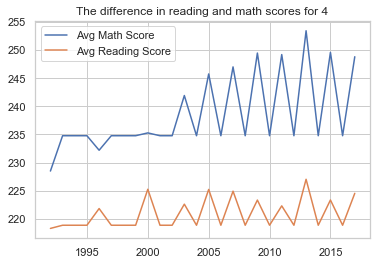

In [9]:
plt.title('The difference in reading and math scores for 4')  

plt.plot(usEducation.loc[usEducation.state=='MINNESOTA', 'year'], 
usEducation.loc[usEducation.state=='MINNESOTA', 'avg_math_4_score'],
label ='Avg Math Score')

plt.plot(usEducation.loc[usEducation.state=='MINNESOTA', 'year'], 
usEducation.loc[usEducation.state == 'MINNESOTA', 'avg_reading_4_score'],
label ='Avg Reading Score')
plt.legend()
plt.show()

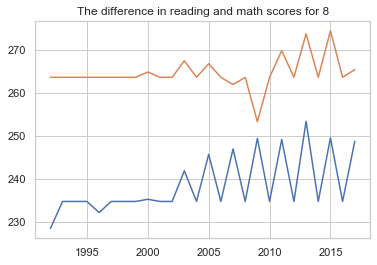

In [10]:
plt.title('The difference in reading and math scores for 8')

plt.plot(usEducation.loc[usEducation.state=='MINNESOTA', 'year'],
usEducation.loc[usEducation.state=='MINNESOTA', 'avg_math_4_score'],
label = 'Avg Math Score')

plt.plot(usEducation.loc[usEducation.state=='MINNESOTA', 'year'],
usEducation.loc[usEducation.state =='MINNESOTA', 'avg_reading_8_score'],
label = 'Avg Reading Score')
plt.show()



It seems students are more successful in math than reading.

# 4) What are the distributions of the math and reading scores in the sample?

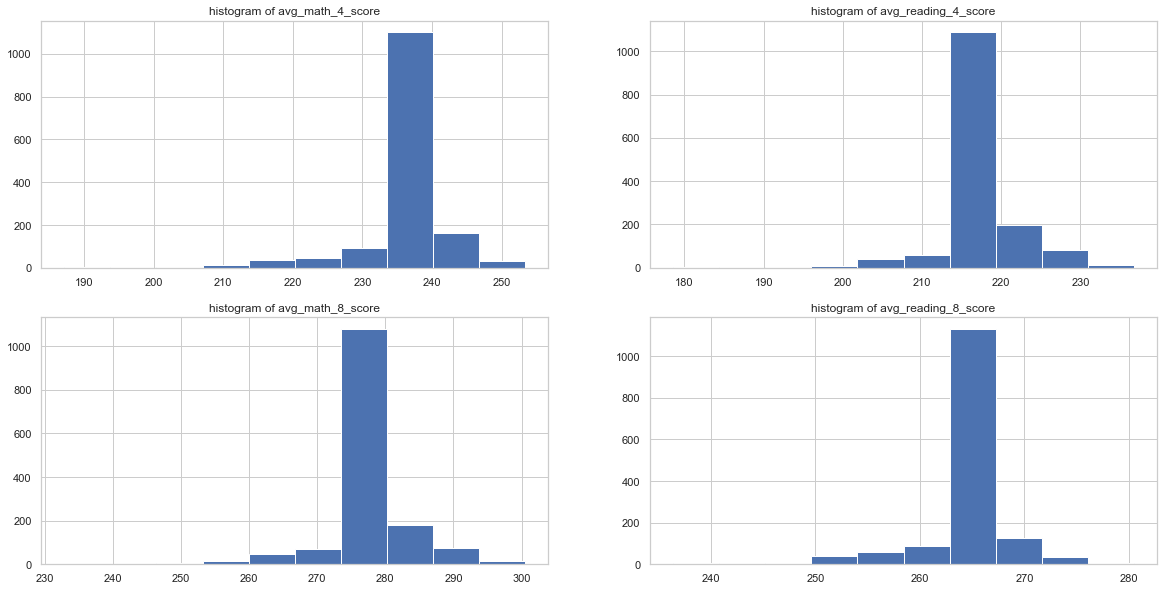

In [11]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.hist(usEducation.avg_math_4_score.dropna())
plt.title("histogram of {}".format("avg_math_4_score"))

plt.subplot(2,2,2)
plt.hist(usEducation.avg_reading_4_score.dropna())
plt.title("histogram of {}".format("avg_reading_4_score"))

plt.subplot(2,2,3)
plt.hist(usEducation.avg_math_8_score.dropna())
plt.title("histogram of {}".format("avg_math_8_score"))

plt.subplot(2,2,4)
plt.hist(usEducation.avg_reading_8_score.dropna())
plt.title("histogram of {}".format("avg_reading_8_score"))
plt.show()

Distributions are not normal, all are right skweed.

# 4) 5. Notice that there are too many missing values for math and reading scores. Fill out the missing values using mean, median and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.¶

In [14]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

usEducation = pd.read_sql_query('select * from useducation',con=engine)
engine.dispose()

usEducation.columns = usEducation.columns.str.lower()

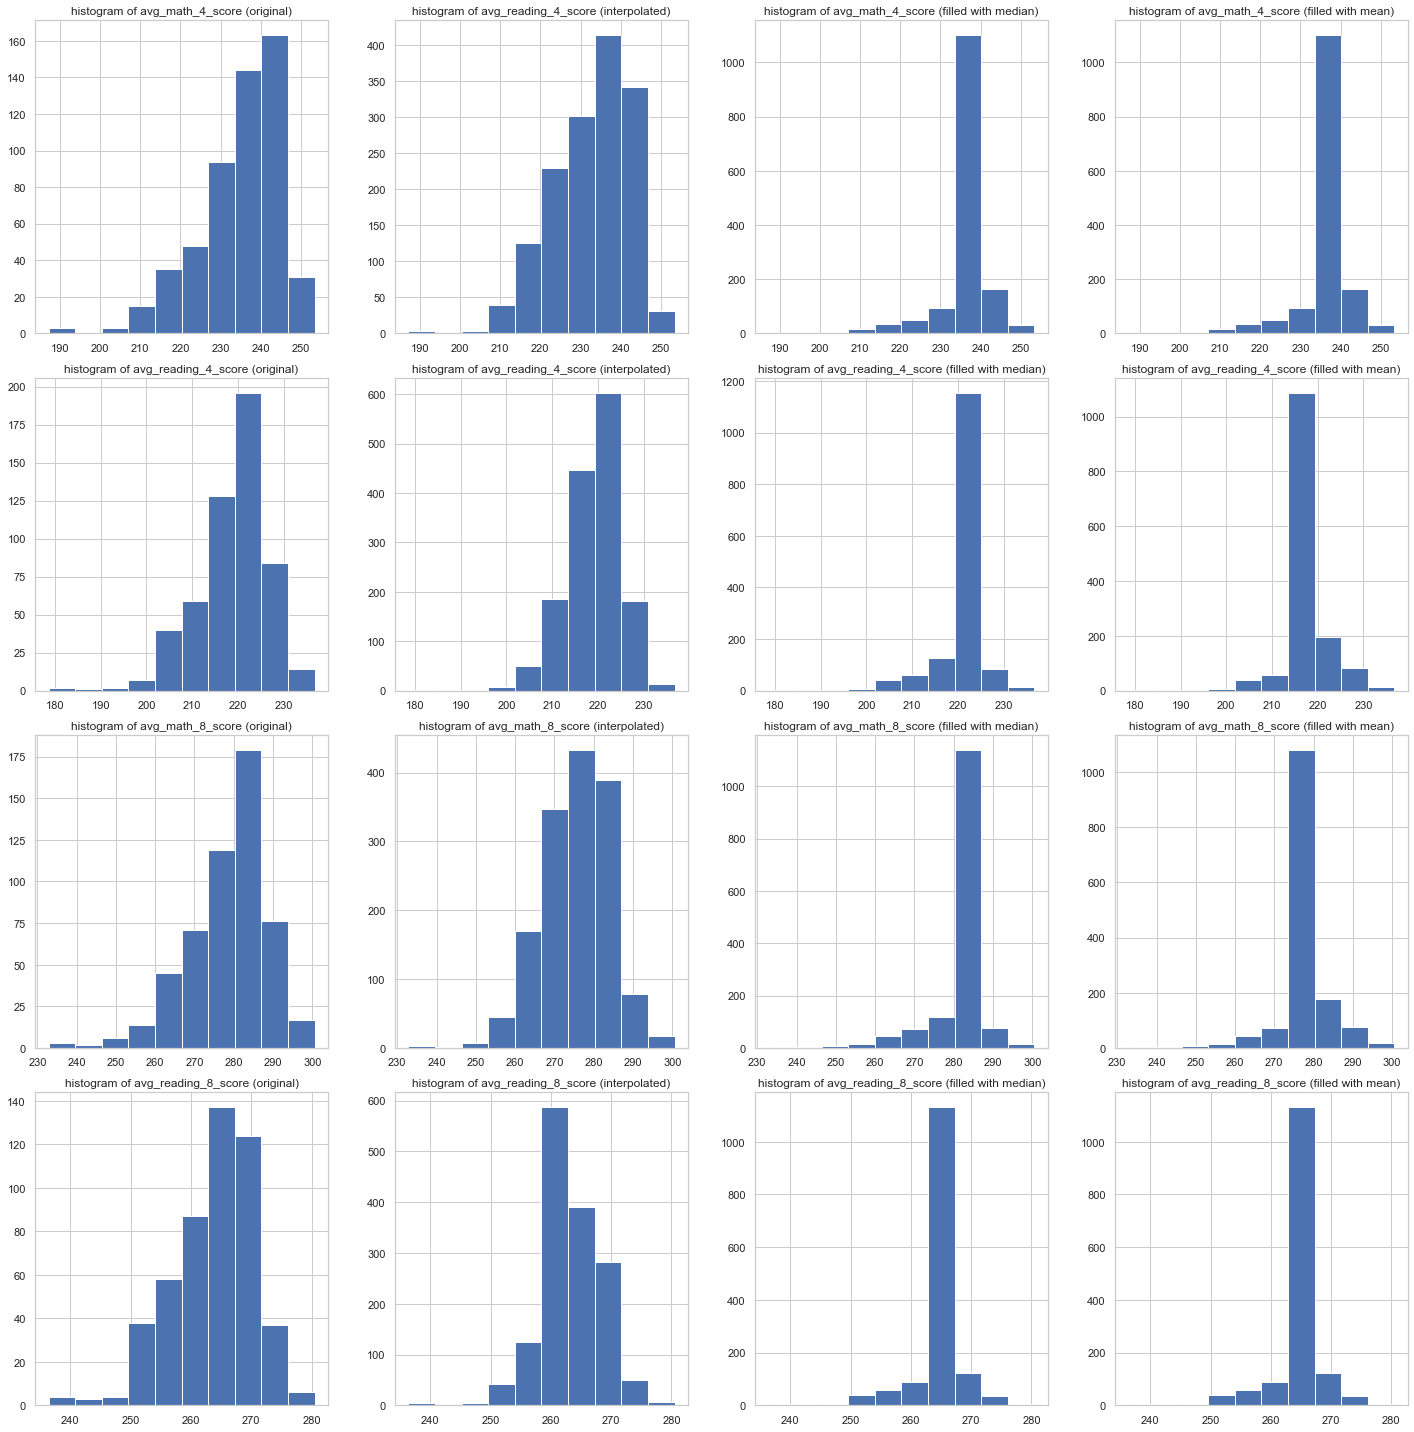

In [15]:
plt.figure(figsize=(20,20))

plt.subplot(4,4,1)
plt.hist(usEducation.avg_math_4_score.dropna())
plt.title("histogram of {} (original)".format("avg_math_4_score"))

plt.subplot(4,4,2)
plt.hist(usEducation.avg_math_4_score.interpolate())
plt.title("histogram of {} (interpolated)".format("avg_reading_4_score"))

plt.subplot(4,4,3)
plt.hist(usEducation.avg_math_4_score.fillna(usEducation.avg_math_4_score.median()))
plt.title("histogram of {} (filled with median)".format("avg_math_4_score"))

plt.subplot(4,4,4)
plt.hist(usEducation.avg_math_4_score.fillna(usEducation.avg_math_4_score.mean()))
plt.title("histogram of {} (filled with mean)".format("avg_math_4_score"))


plt.subplot(4,4,5)
plt.hist(usEducation.avg_reading_4_score.dropna())
plt.title("histogram of {} (original)".format("avg_reading_4_score"))

plt.subplot(4,4,6)
plt.hist(usEducation.avg_reading_4_score.interpolate())
plt.title("histogram of {} (interpolated)".format("avg_reading_4_score"))

plt.subplot(4,4,7)
plt.hist(usEducation.avg_reading_4_score.fillna(usEducation.avg_reading_4_score.median()))
plt.title("histogram of {} (filled with median)".format("avg_reading_4_score"))

plt.subplot(4,4,8)
plt.hist(usEducation.avg_reading_4_score.fillna(usEducation.avg_reading_4_score.mean()))
plt.title("histogram of {} (filled with mean)".format("avg_reading_4_score"))


plt.subplot(4,4,9)
plt.hist(usEducation.avg_math_8_score.dropna())
plt.title("histogram of {} (original)".format("avg_math_8_score"))

plt.subplot(4,4,10)
plt.hist(usEducation.avg_math_8_score.interpolate())
plt.title("histogram of {} (interpolated)".format("avg_math_8_score"))

plt.subplot(4,4,11)
plt.hist(usEducation.avg_math_8_score.fillna(usEducation.avg_math_8_score.median()))
plt.title("histogram of {} (filled with median)".format("avg_math_8_score"))

plt.subplot(4,4,12)
plt.hist(usEducation.avg_math_8_score.fillna(usEducation.avg_math_8_score.mean()))
plt.title("histogram of {} (filled with mean)".format("avg_math_8_score"))


plt.subplot(4,4,13)
plt.hist(usEducation.avg_reading_8_score.dropna())
plt.title("histogram of {} (original)".format("avg_reading_8_score"))

plt.subplot(4,4,14)
plt.hist(usEducation.avg_reading_8_score.interpolate().dropna())
plt.title("histogram of {} (interpolated)".format("avg_reading_8_score"))

plt.subplot(4,4,15)
plt.hist(usEducation.avg_reading_8_score.fillna(usEducation.avg_reading_8_score.median()))
plt.title("histogram of {} (filled with median)".format("avg_reading_8_score"))

plt.subplot(4,4,16)
plt.hist(usEducation.avg_reading_8_score.fillna(usEducation.avg_reading_8_score.mean()))
plt.title("histogram of {} (filled with mean)".format("avg_reading_8_score"))

plt.tight_layout()
plt.show()

Filling in the missing values has great affects on the distributions. Filling with mean or median has the most effect on the variables.